# Example notebook

This notebook demonstrates basic functionality of the CoMap module and walks through the various steps of a typical mapping exercise. 



### Table of Contents

* [1. Simulate the creation of participant maps](#sec1)
* [2. To-do: Create example with a re-categorisation scheme](#sec2)
* [3. Create a CoMap object to hold the aggregate ensemble](#sec3)
    * [Quick summary of key properties of the aggregate ensemble](#sec3_1)
* [4. Study aggregate substructure](#sec4)
* [5. Create a synthetic aggregate](#sec5)
* [6. Compare two different aggregates](#sec6)

In [1]:
import sys
sys.path.append('../.')

import numpy as np
import networkx as nx

import string

from comap.mapper import CoMap
from comap.graph_utils import (compute_graph_deltas)
from comap.helper_utils import (get_reduced_categories)
from comap.plot_utils import (plot_comparative_importance)

## 1. Simulate the creation of participant maps <a class="anchor" id="sec1"></a>

Participants will typically draw their maps on paper. These maps require manual processing to be reformulated as networkX DiGraphs. 

Here we will simulate this process by creating 80 random participant maps, each containing between 5-15 nodes and with a 10% chance of an edge forming between two nodes.

In [2]:
def generate_random_participant_maps(n_maps, p=0.1):
    
    # create 80 random participant graphs
    participant_maps = []
    for i in range(n_maps):
        n = np.random.randint(5,15)
        m = nx.fast_gnp_random_graph(n,p=p, directed=True)
        #randomly remove 3 nodes
        #m.remove_nodes_from( np.random.choice(m.nodes(), size=3) )
        for (u,v) in m.edges():
            m.edges[u,v]['weight'] = 1
    
        participant_maps.append(m)
      
    print('Generated {} random participant maps'.format(len(participant_maps)))


    # Create random labels for the barriers

    # Create a list of all nodes that appear in participant maps
    allnodes=[ list(m.nodes) for m in participant_maps]   
    ## flatten list
    allnodes = [item for sublist in allnodes for item in sublist]
    ## get all uniques
    allnodes = list(set(allnodes))

    # map node numbers to upper case letters
    node_labels = dict(enumerate(string.ascii_uppercase))
    node_labels = {key:value for key, value in node_labels.items() if key in allnodes}
    
    print('Found {} unique nodes and assigned the following labels:\n'.format(len(node_labels)),node_labels)
    
    return participant_maps, node_labels

In [3]:
# Generate 80 random participant maps

participant_maps, node_labels = generate_random_participant_maps(n_maps=80)

Generated 80 random participant maps
Found 14 unique nodes and assigned the following labels:
 {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N'}


## 2. To-do: Create example with a re-categorisation scheme <a class="anchor" id="sec2"></a>

## 3. Create a CoMap object to hold the aggregate ensemble <a class="anchor" id="sec3"></a>



In [4]:
# create an aggregate ensemble from participant maps
G_agg = CoMap(name='raw_aggregate')

G_agg.aggregate_maps( participant_maps,  node_labels)


In [5]:
# To access the underlying networkx DiGraph, and corresponding functions:

graph = G_agg.map

print('nodes:', list(graph.nodes()))
print('number of edges:', graph.number_of_edges())

print(nx.pagerank(graph))

nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']
number of edges: 162
{'A': 0.08116948333574645, 'B': 0.10362733502423456, 'C': 0.09378175409051707, 'D': 0.09397756099909263, 'E': 0.09595616684587052, 'F': 0.08452193737725076, 'G': 0.09353679478444443, 'H': 0.08169314238647936, 'I': 0.06454697610791307, 'J': 0.05696663118621297, 'K': 0.04540580178482766, 'L': 0.04462019794194409, 'M': 0.03453455394790713, 'N': 0.025661664187559267}


<ipython-input-6-43d5ffb96653>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


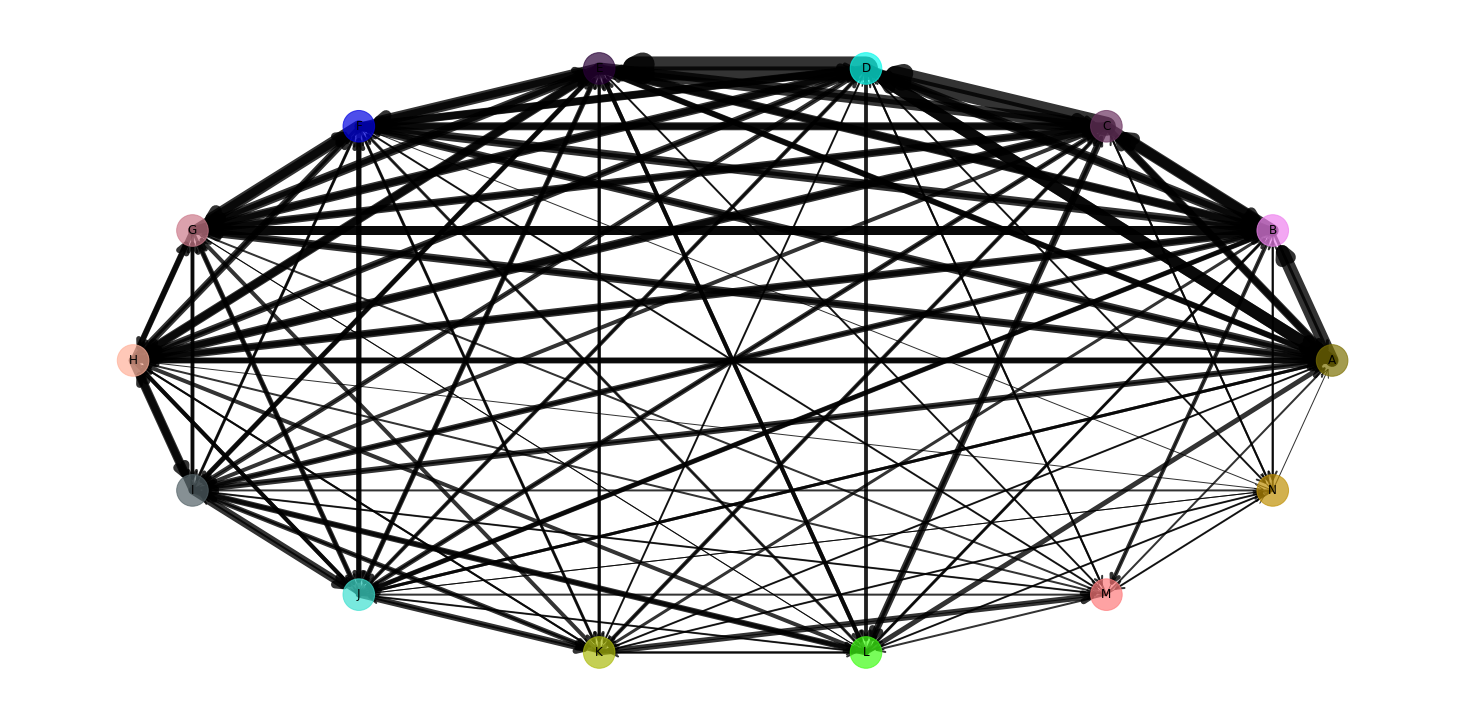

In [6]:
# Simple visualisation of the aggregate ensemble

f = G_agg.plot_map()
f.show()

### Quick summary of key properties of the aggregate ensemble <a class="anchor" id="sec3_1"></a>

In [7]:
G_agg.map_properties()

,Node_degree,Out_degree,Out_degree_wg,In_degree,In_degree_wg,Pagerank,Eigenvector_centrality,Degree_centrality,Closeness_centrality,Betweenness_centrality
B,25,13,67,12,82,0.103627,0.272350,1.923077,0.928571,0.003399
E,24,12,77,12,77,0.095956,0.279501,1.846154,0.928571,0.001068
D,26,13,87,13,71,0.093978,0.293881,2.000000,1.000000,0.003399
C,23,11,78,12,71,0.093782,0.279263,1.769231,0.928571,0.002331
G,22,10,52,12,74,0.093537,0.279501,1.692308,0.928571,0.001068
F,25,12,66,13,64,0.084522,0.293881,1.923077,1.000000,0.003399
H,23,11,58,12,63,0.081693,0.279501,1.769231,0.928571,0.003399
A,23,10,62,13,63,0.081169,0.293881,1.769231,1.000000,0.003399
I,24,12,51,12,45,0.064547,0.271754,1.846154,0.928571,0.003399
J,25,13,47,12,40,0.056967,0.279263,1.923077,0.928571,0.003399


In [8]:
#sort by weighted outdegree and betweenness_centrality
G_agg.map_properties(sort_by=['Out_degree_wg','Betweenness_centrality'])

,Node_degree,Out_degree,Out_degree_wg,In_degree,In_degree_wg,Pagerank,Eigenvector_centrality,Degree_centrality,Closeness_centrality,Betweenness_centrality
D,26,13,87,13,71,0.093978,0.293881,2.000000,1.000000,0.003399
C,23,11,78,12,71,0.093782,0.279263,1.769231,0.928571,0.002331
E,24,12,77,12,77,0.095956,0.279501,1.846154,0.928571,0.001068
B,25,13,67,12,82,0.103627,0.272350,1.923077,0.928571,0.003399
F,25,12,66,13,64,0.084522,0.293881,1.923077,1.000000,0.003399
A,23,10,62,13,63,0.081169,0.293881,1.769231,1.000000,0.003399
H,23,11,58,12,63,0.081693,0.279501,1.769231,0.928571,0.003399
G,22,10,52,12,74,0.093537,0.279501,1.692308,0.928571,0.001068
I,24,12,51,12,45,0.064547,0.271754,1.846154,0.928571,0.003399
J,25,13,47,12,40,0.056967,0.279263,1.923077,0.928571,0.003399


In [9]:
G_agg.get_n_highest_ranking_nodes(n=10)

Rank,Node_degree,Out_degree,Out_degree_wg,In_degree,In_degree_wg,Pagerank,Eigenvector_centrality,Degree_centrality,Closeness_centrality,Betweenness_centrality
1,D,B,D,D,B,B,D,D,D,B
2,B,D,C,F,E,E,F,B,F,D
3,F,J,E,A,G,D,A,F,A,F
4,J,E,B,B,D,C,E,J,B,H
5,E,F,F,E,C,G,G,E,E,A
6,I,I,A,C,F,F,H,I,C,I
7,K,K,H,G,H,H,C,K,G,J
8,C,L,G,H,A,A,J,C,H,K
9,H,C,I,I,I,I,B,H,I,L
10,A,H,J,J,J,J,I,A,J,C


.././comap/plot_utils.py:250: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0, 0.5, 'Weighted in-degree')

findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.


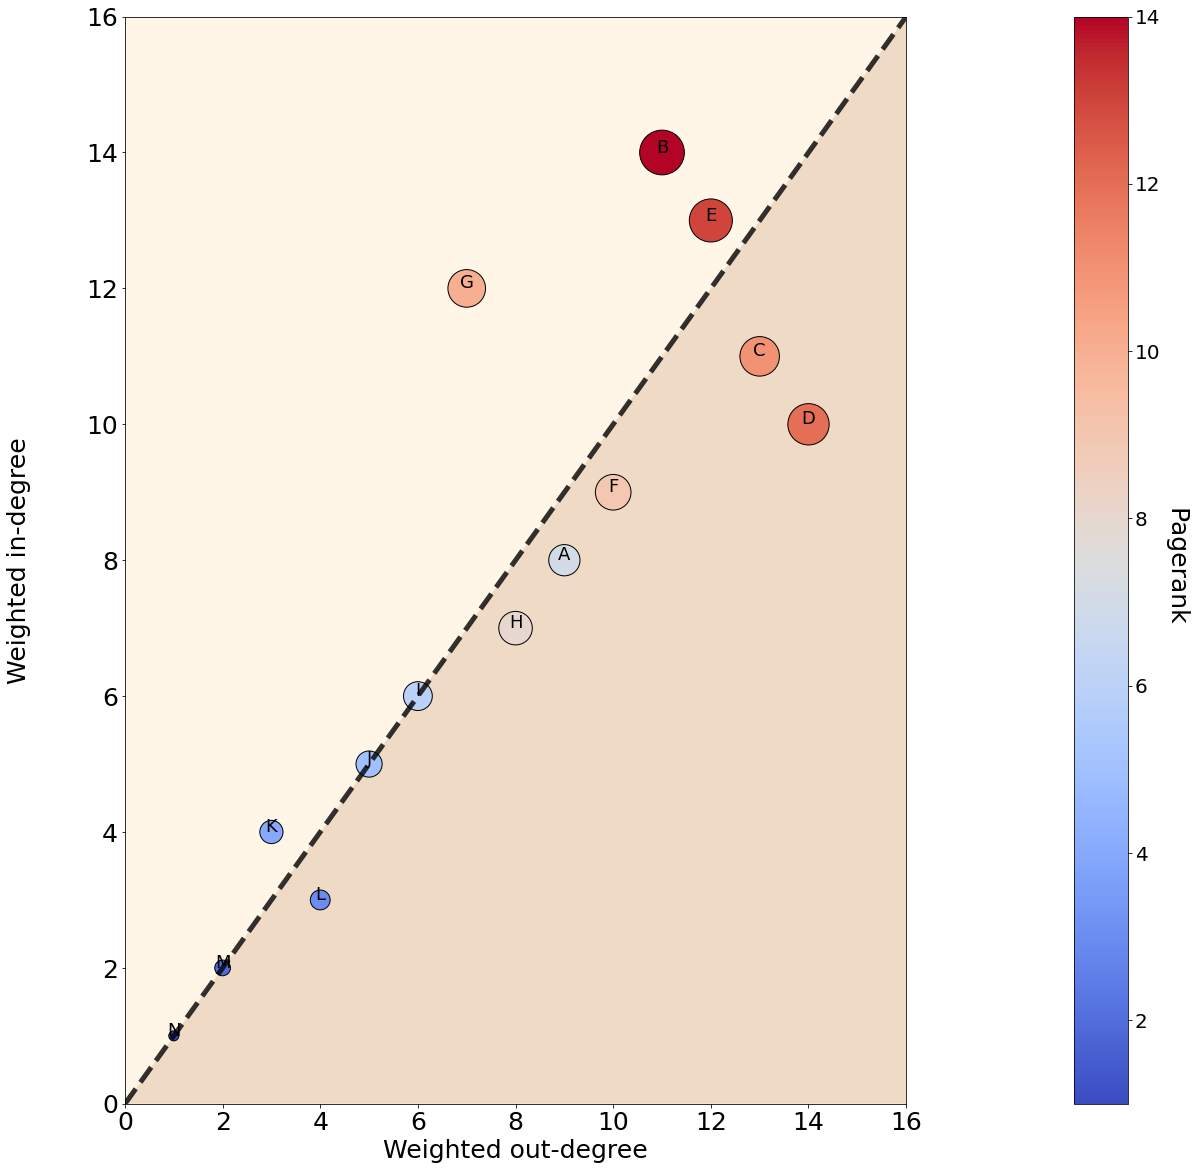

In [10]:
# Plot quadrant scatter and access figure to make decorative changes

f = G_agg.plot_quadrant_scatter()

ax = f.gca()
ax.set_xlabel('Weighted out-degree')
ax.set_ylabel('Weighted in-degree', labelpad=55)

## 4. Study aggregate substructure <a class="anchor" id="sec4"></a>


E.g access ego networks.

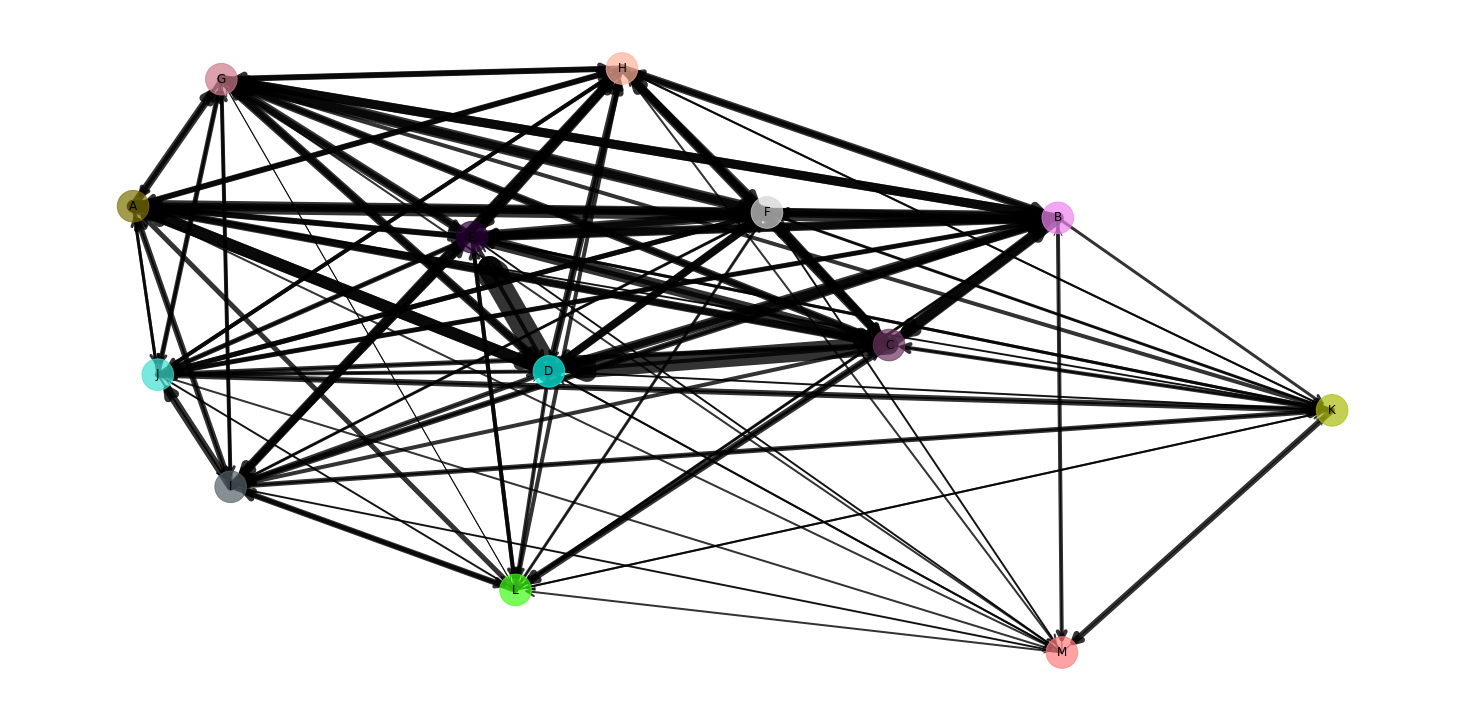

In [11]:
f = G_agg.plot_ego_map('F',direction='Undirected', layout='spring')


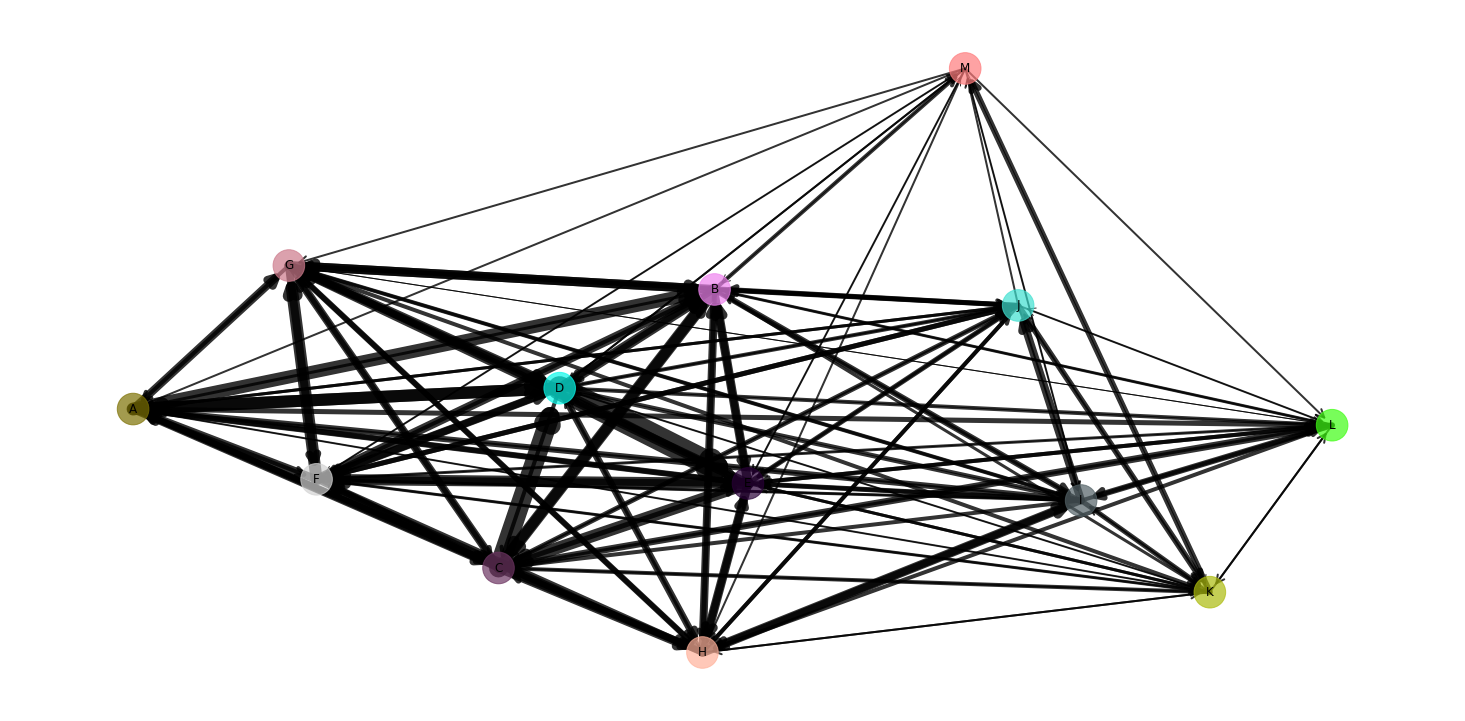

In [12]:
# Only outgoing ego-network

f = G_agg.plot_ego_map('F',direction='Outgoing', layout='spring')



## 5. Create a synthetic aggregate <a class="anchor" id="sec5"></a>

Create a synthetic aggregate modelled on the raw aggregate.

.././comap/plot_utils.py:286: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


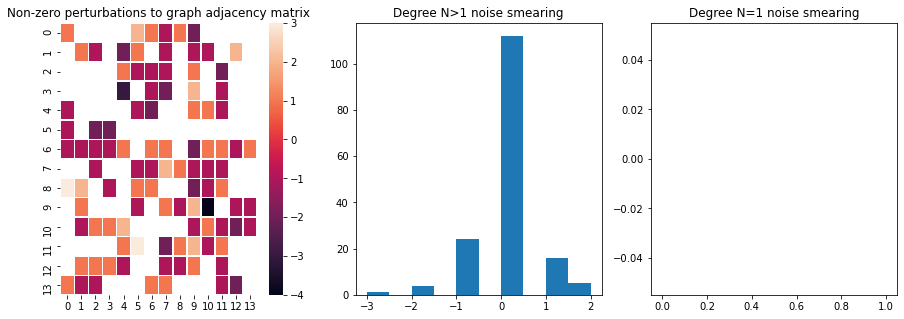

In [13]:
S_agg, m_diff, degN_noise, deg1_noise = G_agg.generate_synthetic_graph(noise_scale=.5, smear_func='laplace')

### Visualise synthetic aggregate

<ipython-input-14-329ed136f862>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


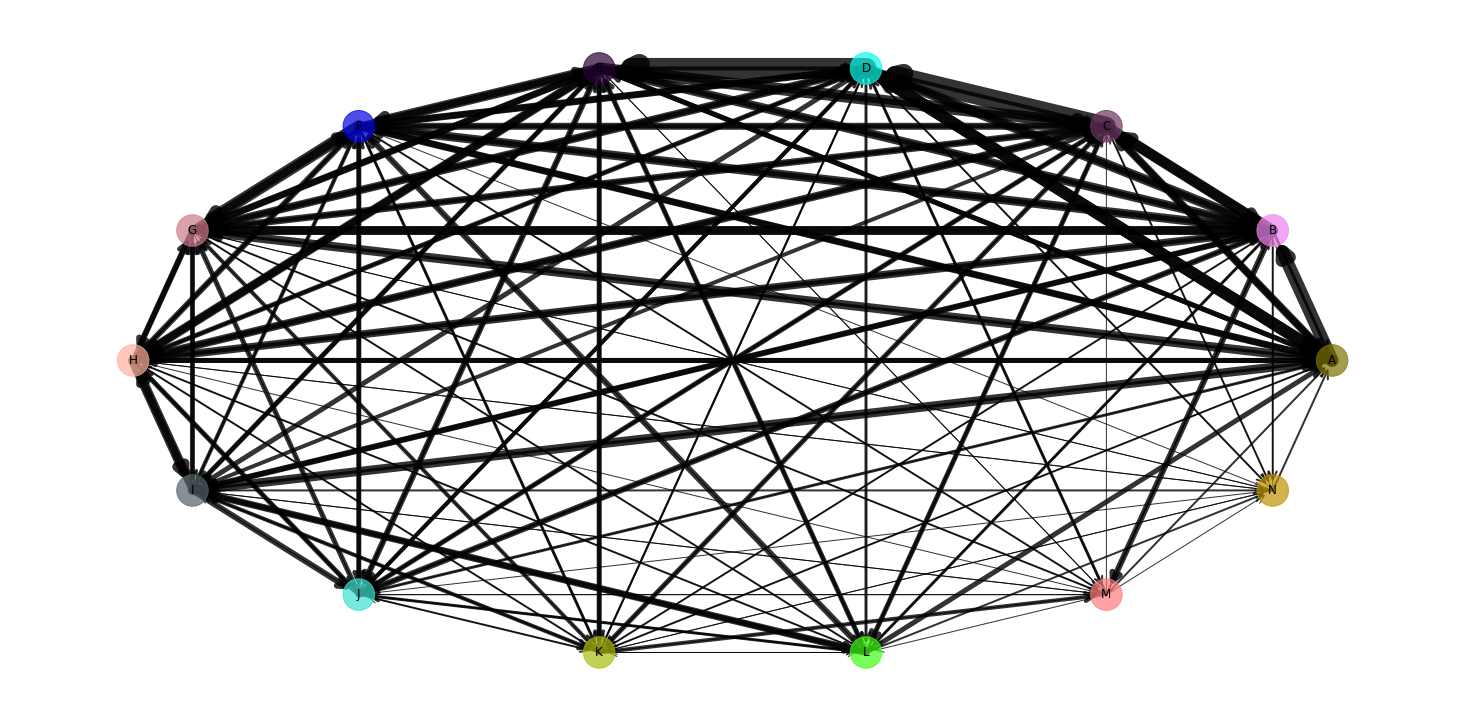

In [14]:
f = S_agg.plot_map()
f.show()

In [15]:
S_agg.get_n_highest_ranking_nodes(n=5)

Rank,Node_degree,Out_degree,Out_degree_wg,In_degree,In_degree_wg,Pagerank,Eigenvector_centrality,Degree_centrality,Closeness_centrality,Betweenness_centrality
1,B,B,D,B,B,B,B,B,B,B
2,G,G,C,G,E,E,G,G,G,G
3,K,K,E,A,G,G,A,K,C,D
4,H,D,B,H,D,D,H,H,F,C
5,J,H,A,J,C,C,J,J,A,F


<ipython-input-16-483ed4162709>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


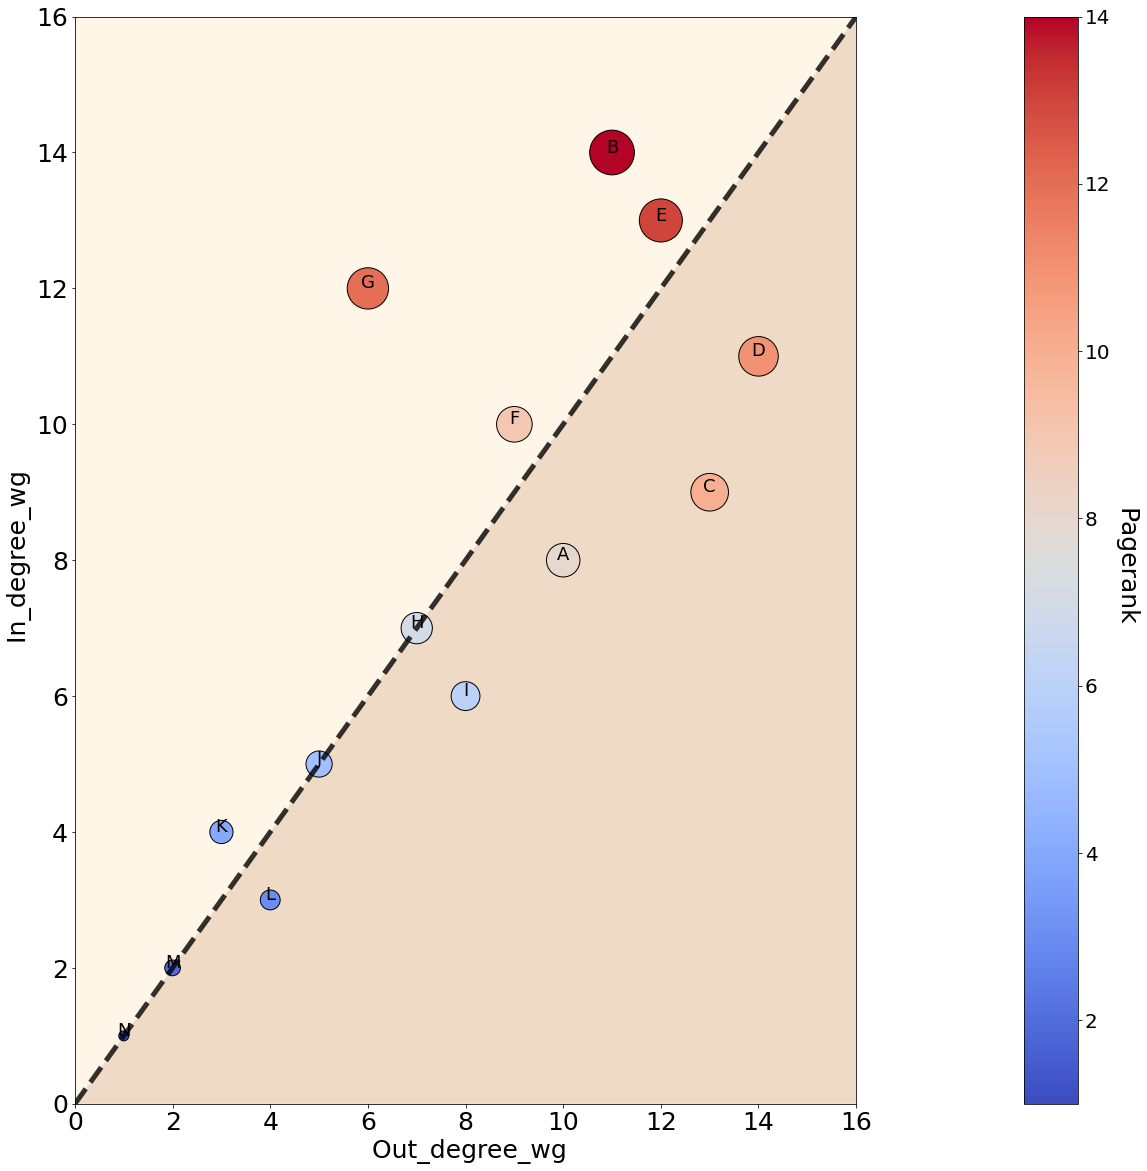

In [16]:
f = S_agg.plot_quadrant_scatter()
f.show()

# 6. Compare two different aggregates <a class="anchor" id="sec6"></a>

<ipython-input-21-638e760adae2>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


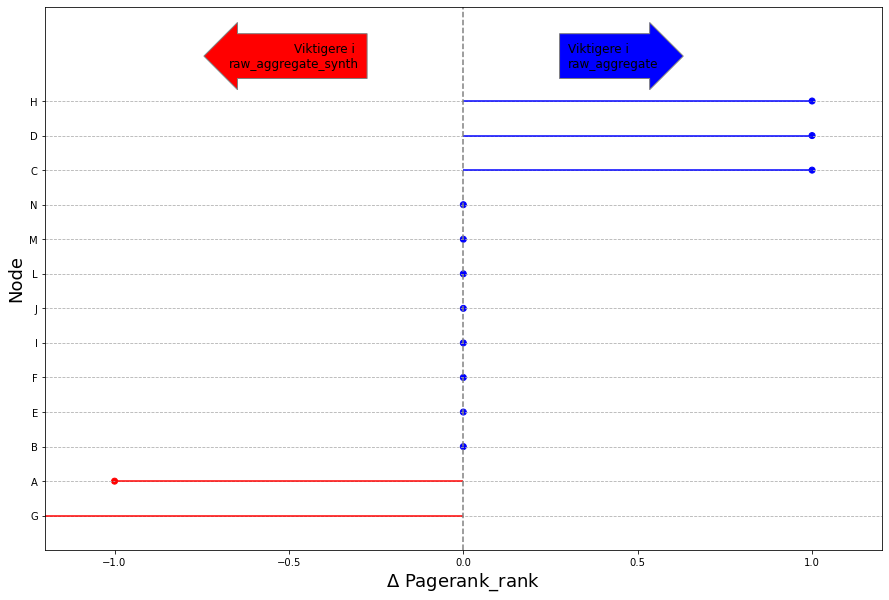

In [21]:
f = plot_comparative_importance((G_agg, S_agg), var='Pagerank', col=('b','r'), compare_rank=True, excl=['K'])
f.set_size_inches(15, 10, forward=True)
f.show()